In [1]:
from sktime.utils.load_data import load_from_arff_to_dataframe, load_from_tsfile_to_dataframe
from sktime.contrib.workshop_shapelets.shapelets import ContractedShapeletTransform
import time
%matplotlib inline
import matplotlib.pyplot as plt

## Univariate Example: GunPoint

In [2]:
# Load datasets
dataset = "GunPoint"

train_x, train_y = load_from_tsfile_to_dataframe("../sktime/datasets/data/"+dataset+"/"+dataset+"_TRAIN.ts")
test_x, test_y = load_from_tsfile_to_dataframe("../sktime/datasets/data/"+dataset+"/"+dataset+"_TRAIN.ts")

In [3]:
# Create Contracted Shapelet Transform with time limit of 1 monute:
st = ContractedShapeletTransform(
    random_state=0,
    verbose=0,
    time_limit_in_mins=1,
    num_candidates_to_sample_per_case=5,
    max_shapelets_to_store_per_class=1000,
    remove_self_similar=True
)

In [4]:
# Fit the transform
start_time = time.time()
shapelets = st.fit(train_x, train_y)
end_time = time.time()
print("Time taken: "+str(end_time-start_time))

Num shapelets  len of shapelets:96
Num shapelets  len of shapelets:88
Time taken: 59.607404947280884


In [5]:
# print the 5 best shapelets extracted in the minute:
for s in range(5):
    print(st.shapelets[s])

Series ID: 4, start_pos: 91, length: 42, info_gain: 0.8749030545442665, 
Series ID: 42, start_pos: 3, length: 46, info_gain: 0.7133121635877098, 
Series ID: 13, start_pos: 11, length: 54, info_gain: 0.7133121635877098, 
Series ID: 29, start_pos: 8, length: 45, info_gain: 0.7133121635877098, 
Series ID: 18, start_pos: 5, length: 45, info_gain: 0.6504518266138437, 


In [6]:
# Transform the training data, then visualise the first 5 transformed cases
t_train_x = st.transform(train_x)
print("Number of shapelets:    "+str(len(st.shapelets))+" (columns)")
print("Number of series:       "+str(len(train_x))+" (rows) (limited to 5 below for presentation)")
t_train_x.head()

Number of shapelets: 66 (columns)
Number of series:    50 (rows) (limited to 5 below for presentation)


,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.242066,0.034702,0.025347,0.046360,0.025347,0.006523,0.008491,0.045361,0.003102,0.017740,...,0.004599,0.006201,0.334409,0.146976,1.046997,0.002524,0.832400,0.011327,0.182494,0.016290
1,0.339909,0.033037,0.022411,0.043099,0.020515,0.008825,0.005987,0.041794,0.003311,0.020801,...,0.010564,0.010164,0.410799,0.168848,1.081807,0.008405,0.826245,0.016957,0.808123,0.048921
2,1.059285,0.023352,0.018277,0.029039,0.018347,0.086987,0.000822,0.025140,0.005341,0.038247,...,0.002675,0.033355,0.185000,0.135053,0.873909,0.003471,0.715724,0.014257,0.270295,0.077216
3,1.088938,0.013343,0.014633,0.021925,0.009397,0.069400,0.000723,0.010082,0.002557,0.052318,...,0.002342,0.010469,0.307294,0.107051,0.906446,0.002613,0.785126,0.029165,0.321600,0.070641
4,0.000000,0.044380,0.027431,0.052119,0.028572,0.008805,0.008236,0.019989,0.008789,0.022171,...,0.002174,0.035494,0.519384,0.179364,1.151845,0.009633,0.999105,0.020215,0.026732,0.056777


Series ID: 4, start_pos: 91, length: 42, info_gain: 0.8749030545442665, 


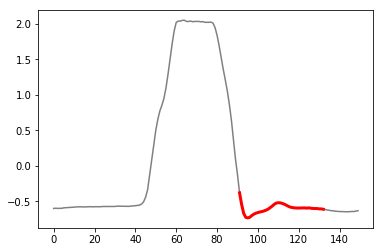

Series ID: 42, start_pos: 3, length: 46, info_gain: 0.7133121635877098, 


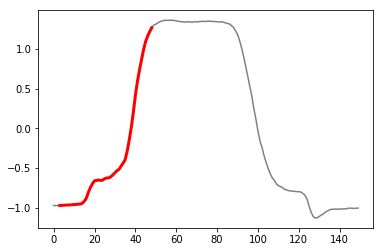

Series ID: 13, start_pos: 11, length: 54, info_gain: 0.7133121635877098, 


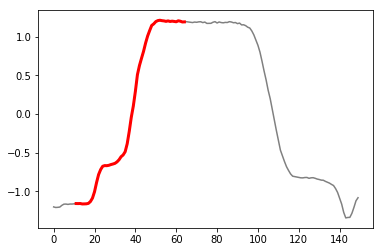

Series ID: 29, start_pos: 8, length: 45, info_gain: 0.7133121635877098, 


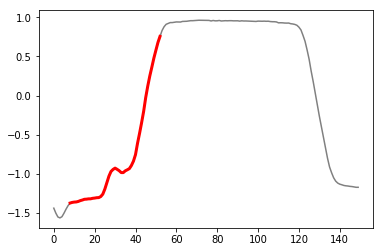

Series ID: 18, start_pos: 5, length: 45, info_gain: 0.6504518266138437, 


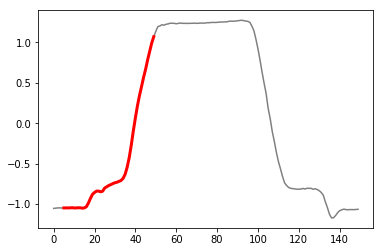

In [7]:
# Plot the top 5 shapelets on top of the series that they were extracted from 

for s in st.shapelets[0:5]:

    # summary info about the shapelet 
    print(s)
    
    # plot the series that the shapelet was extracted from 
    plt.plot(
        train_x.iloc[s.series_id,0],
        'gray'
    )
    
    # overlay the shapelet onto the full series
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,0][s.start_pos:s.start_pos+s.length],
        'r',
        linewidth=3.0
    )
    plt.show()

## Multivariate Example: BasicMotions

In [8]:
# All steps as above for a multivariate datasets. The only difference is the last step, where we plot the single
# best shapelet from the 1 minute search across the 6 dimensions of the BasicMotions problem
dataset = "BasicMotions"

train_x, train_y = load_from_arff_to_dataframe("../sktime/datasets/data/"+dataset+"/"+dataset+"_TRAIN.arff")
test_x, test_y = load_from_arff_to_dataframe("../sktime/datasets/data/"+dataset+"/"+dataset+"_TRAIN.arff")

In [9]:
st = ContractedShapeletTransform(
    random_state=0,
    verbose=0,
    time_limit_in_mins=1,
    num_candidates_to_sample_per_case=5,
    max_shapelets_to_store_per_class=1000,
    remove_self_similar=True
)

In [10]:
start_time = time.time()
shapelets = st.fit(train_x, train_y)
end_time = time.time()

Num shapelets  len of shapelets:29
Num shapelets  len of shapelets:30
Num shapelets  len of shapelets:24
Num shapelets  len of shapelets:25


In [11]:
for s in range(5):
    print(st.shapelets[s])

Series ID: 34, start_pos: 7, length: 16, info_gain: 0.7793498372920851, 
Series ID: 32, start_pos: 52, length: 16, info_gain: 0.7793498372920851, 
Series ID: 38, start_pos: 26, length: 34, info_gain: 0.7793498372920851, 
Series ID: 15, start_pos: 5, length: 10, info_gain: 0.7793498372920851, 
Series ID: 11, start_pos: 28, length: 67, info_gain: 0.7793498372920851, 


In [12]:
t_train_x = st.transform(train_x)

In [13]:
print("Number of shapelets: "+str(len(st.shapelets))+" (columns)")
print("Number of series:    "+str(len(train_x))+" (rows) (limited to 5 below for presentation)")
t_train_x.head()

Number of shapelets: 32 (columns)
Number of series:    40 (rows) (limited to 5 below for presentation)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,9.087704,7.660609,9.230918,6.825088,9.014711,8.195935,9.977531,9.908795,9.565507,7.622776,...,9.130211,9.271908,6.153479,8.546729,9.472945,5.585067,9.889419,8.856012,10.050546,7.757256
1,8.550524,8.154695,10.175035,5.894477,10.725486,8.836551,9.607689,10.106716,7.844720,7.878687,...,9.356986,6.910237,8.514604,6.641129,9.820799,0.000000,10.016674,7.157276,9.165337,9.122934
2,8.343170,9.297749,10.139708,6.934751,10.649140,10.220429,9.280798,10.553906,8.495461,6.929965,...,10.146383,7.527481,9.845144,4.658663,0.000000,6.901039,8.989892,8.768519,8.860740,8.610177
3,8.172683,8.773522,9.310301,6.175652,10.170527,9.128287,8.416854,8.961857,7.586017,7.712330,...,9.330817,8.173509,9.749538,3.628797,7.856074,7.180964,9.618244,6.331863,7.156329,7.973079
4,9.167081,8.189700,10.361890,5.861221,10.317463,9.044380,10.341274,10.484953,6.242057,7.530817,...,9.676413,0.000000,8.537210,4.841238,7.184250,5.864655,9.202712,7.323326,8.853732,9.552649


### Single shapelet visualised over the 6 dimensions of BasicMotions

Series ID: 34, start_pos: 7, length: 16, info_gain: 0.7793498372920851, 
Dimension 1


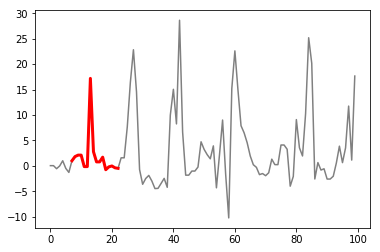

Dimension 2


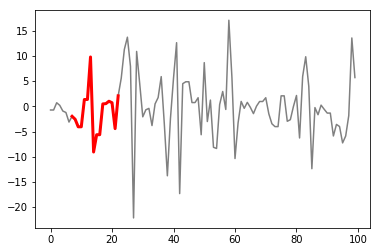

Dimension 3


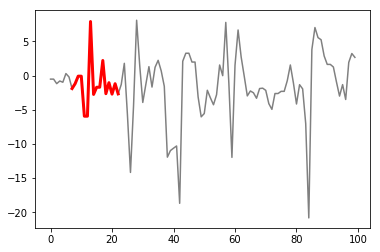

Dimension 4


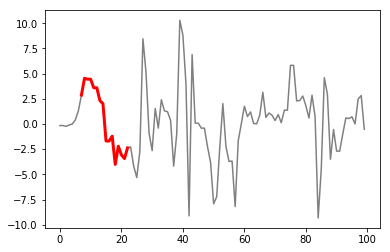

Dimension 5


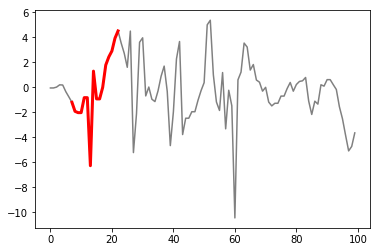

Dimension 6


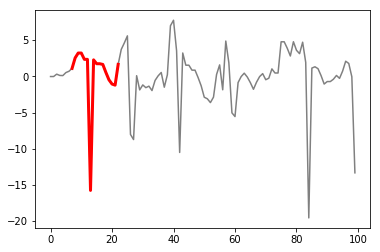

In [14]:
s = st.shapelets[0]
print(s)
# for each extracted shapelet (in descending order of quality/information gain)
for dim in range(len(train_x.iloc[0])):
    print("Dimension "+str(dim+1))   
    # plot the series that the shapelet was extracted from 
    plt.plot(
        train_x.iloc[s.series_id,dim],
        'gray'
    )
    
    # overlay the shapelet onto the full series
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,dim][s.start_pos:s.start_pos+s.length],
        'r',
        linewidth=3.0
    )
    plt.show()